<a href="https://colab.research.google.com/github/Kanakbaghel/DS_learning_path/blob/main/Hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Import relevant Python Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from IPython.display import display, HTML

# CENTRAL LIMIT THEOREM
---
---

Central Limit Theorem (CLT)

Suppose you have a bunch of independent data points from the same population.

If you take a large number of samples from this population and compute the mean of each sample, something amazing happens:

No matter what the original population looks like, the distribution of the sample means will look approximately normal (bell-shaped) as the sample size gets bigger.

---

Assumptions:-

* We have a population that is not normally distributed (it can be but for this example we don't have one).

* We take a lot of samples from that population.

* Each sample we take has a very large enough size.

* Every data point in the population has an equal and random chance of being selected for sampling. **(random sampling without bias)**

* If a data point is selected in 1 sample, it can still be selected in any subsequent sample(s) since we are picking up the data point, writing it down and placing it back in the original population for the next sample being drawn. **(sampling with replacement)**

Following **ALL** of the above assumptions we move ahead.

After sampling, We examine the samples and take the mean of each sample and note it down.

Then we plot these means taken on a histogram.

We see that the histogram looks like a normal distribution

Let's assume our entire population is the full Total Rooms column in the California Housing Train Dataset

In [ ]:
#@title California Housing Train Dataset - Total Rooms

population = pd.read_csv('/content/sample_data/california_housing_train.csv')

population = population['total_rooms']   # This will be our population i.e. (all data points) for this exercise

print(f'First 5 rows of total rooms:')
display (population.head())
print(f'Number of rows in total rooms: {len(population)}')

First 5 rows of total rooms:


,total_rooms
0,5612.0
1,7650.0
2,720.0
3,1501.0
4,1454.0


Number of rows in total rooms: 17000


In [ ]:
#@title Sample Parameters
N = 100000   # How many samples you want to take
n = 1000  # Size of each sample
plot_samples = 25   # how many samples to actually plot

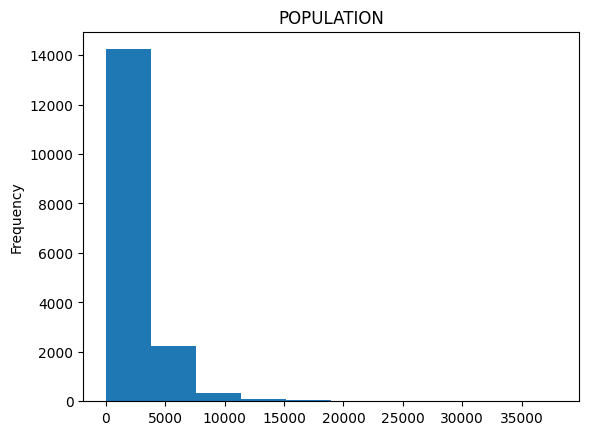

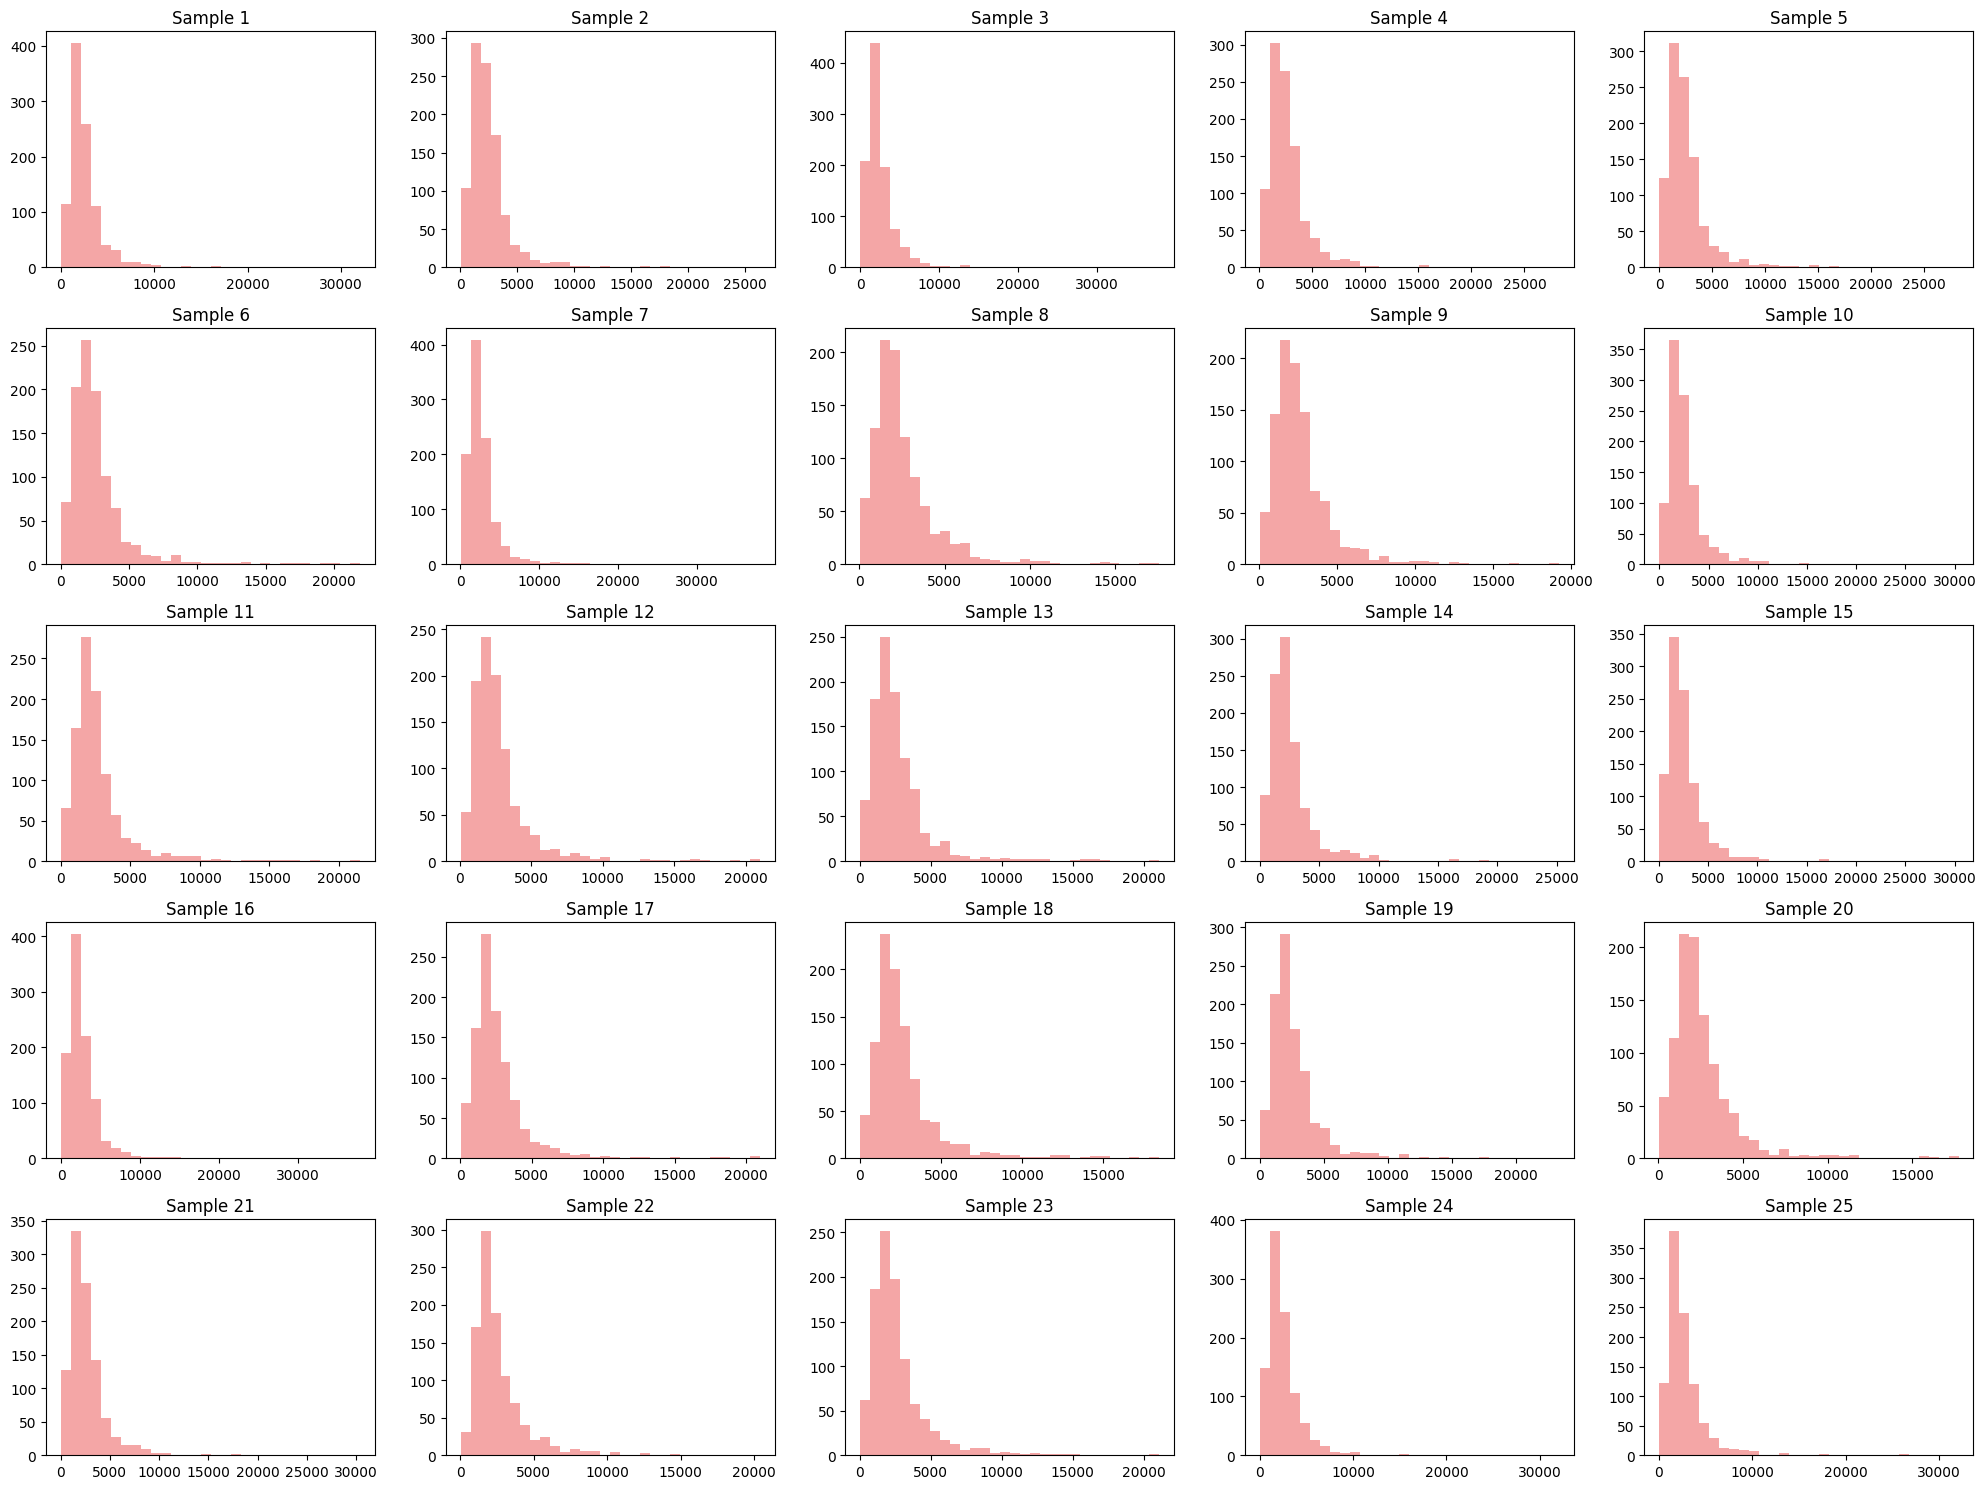

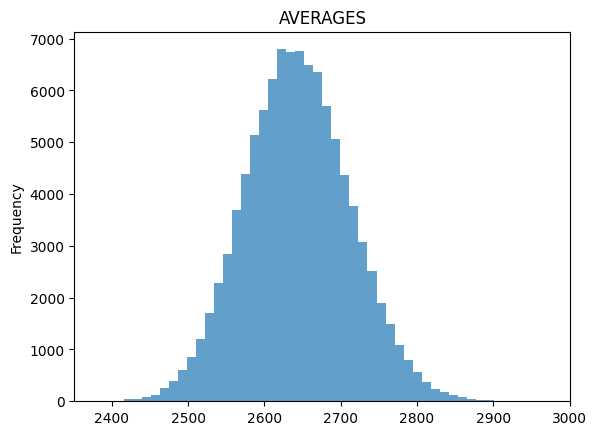

In [ ]:
#@title Sampling from the dataset

# --- Plot population ---
population.plot(kind='hist', title='POPULATION')
plt.show()

# --- Generate all samples for averages ---
samples = np.random.choice(population, size=(N, n), replace=True)

# --- Plot a few sample histograms ---
rows = math.ceil(math.sqrt(plot_samples))
cols = math.ceil(plot_samples / rows)

fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
axes = axes.flatten()

for i in range(plot_samples):
    axes[i].hist(samples[i], bins=30, color='lightcoral', alpha=0.7)
    axes[i].set_title(f"Sample {i+1}")

# Hide unused subplots
for j in range(plot_samples, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# --- Compute means ---
averages = samples.mean(axis=1)

# Plot averages distribution
pd.Series(averages).plot(kind='hist', bins=50, title='AVERAGES', alpha=0.7)
plt.show()

The above histogram graph of AVERAGES seems to follow a normal distribution even though the population was not very normal looking.

This sampling exercise has been set up so that each time you run the code, you will get a different outcome. But all outcomes should be normally distributed. Try it!

The Central Limit Theorem says:

* No matter what the population looks like, the distribution of sample means (if the sample size is reasonably large) will look approximately normal (bell-shaped).

* That normal distribution will be centered at the true population mean. Or at least the centre will be close to the true population mean.

# HYPOTHESIS TESTING
---
---

In this case, we are working with finite population data (17000 rows), so it's possible to know the population mean (μ) and standard deviation (σ). But in practicality, we very rarely know the population parameters.

---
**Cases where population parameters can be known**
* Company payroll records – salaries of all employees in a company (if HR has the entire dataset).
* Student marks – when a school maintains the scores of all students in a particular exam.
* Inventory databases – stock details in a warehouse or store, where every item is counted and tracked.
---
**Cases where population parameters are not known (typical in practice)**
* Customer satisfaction / opinion polls – you can’t ask every customer or citizen, so you sample.
* Medical research – cannot test every patient in the world, so rely on samples (e.g., drug trials).
* Agriculture / environment – soil quality, crop yield, or air pollution across vast regions, only sampled at locations.

Even though it's easy to find out, let's assume that we don't know the population mean here for total rooms. In practicality, we cannot always get an accurate answer for population mean. We can only estimate. How do we estimate? Through taking a sample and applying hypothesis testing.

 ## Null Hypothesis
We start with a Null Hypothesis ($H_0$). $H_0$ is an assumption made for the actual population mean value. Practically, it could be something you have heard of, or something you might say with experience but without data to back it up.
eg.

`He said, "based on my experience working in California's Housing Sector for 7 years, I think the average number of total rooms per house is 2300"`

You don't know if it's true if you can't study the population, you have to find out with the data and mathematical methods available.

---
**Everything in testing revolves around the null hypothesis ($H_0$). We check whether our sample deviates considerably from the null hypothesis. We challenge the null hypothesis with an alternative hypothesis($H_a$).**


**If our data suggests that $H_a$ should be rejected, it doesn't mean we automatically accept $H_0$ as true. It could also be that we don't have enough data to know for sure that $H_0$ is false. Because $H_0$ has been conjectured based on judgment or experience rather than solid data**


**Hence we always either REJECT $H_0$ or FAIL to reject it. Never accept it.**

---

Our null hypothesis says that our ASSUMED population mean ($\mu$) is 2300

So our alternative to disprove that should say that population mean is NOT 2300

$$H_0 = 2300$$

$$H_a \neq 2300$$

---
**Everything in testing revolves around the null hypothesis.**

AND

The Central Limit Theorem says:

* No matter what the population looks like, the distribution of sample means (if the sample size is reasonably large) will look approximately normal (bell-shaped).

* That normal distribution will be centered at the true population mean ($\mu$). Or at least the centre will be close to the true population mean ($\mu$).

So, IF our $H_0$ is true
AND
we take any random sample from the population,

then that sample's mean should be:-
* close to the true population mean ($\mu$)
* part of the normal distribution which is centred around the true population mean ($\mu$)

Let's test this...

In [ ]:
#@title Sample

# Picking 1 random sample
sample = np.random.choice(population, size=(1, n), replace=True)

display( HTML(f"Random Sample of size {len(sample[0])} picked with mean {sample.mean()}" ) )

To test the sample mean, we need to compare it to the $H_0$ mean ($\mu$). But the difference between ($\mu$) and the sample mean ($\bar{x}$) could be any value. How do we know if it's too big or too small? Big, small, these are relative terms.

To get an absolute confidence on whether the deviation between the 2 means is significantly big or small, we use a distribution. We know about the normal distribution. But since our population is not normally distributed, we can't use the population parameters.

As per the Central Limit Theorem, if we take many large samples from a population and plot them, we get a normal distribution of the sample means whose centre point is close to the population mean ($\mu$).

Logically, our sample mean ($\bar{x}$) must also be part of this distribution since it's 1 possible sample out of the infinite number of random samples that can be drawn from the population and plotted, giving us the normal distribution.

## P-value and significance

Since we assumed that we don't know the population parameters like the population standard deviation ($σ$), we have to use the t-distribution to find the probability -- ***the probability of picking a sample (like ours) that has a sample mean like this one, assuming $H_0$ is true***.

Let's break down this statement:-
*   **IF** $H_0$ is true. Meaning $\mu$=2300,
*   what is the probability that we would get a sample like this with this mean ($\bar{x}$)?

OR

The p-value = IF $H_0$ is true, the probability of getting a sample with this sample mean ($\bar{x}$).

If the p-value is high, it means that there is a high chance that our $H_0$ is correct since our $\bar{x}$ is close to the $\mu$ and us challenging it fails (Fail to reject).

If the p-value is low, it means that there is a low chance that our $H_0$ is correct since our $\bar{x}$ is farther from our $\mu$ and we are successful in challenging it (Reject).

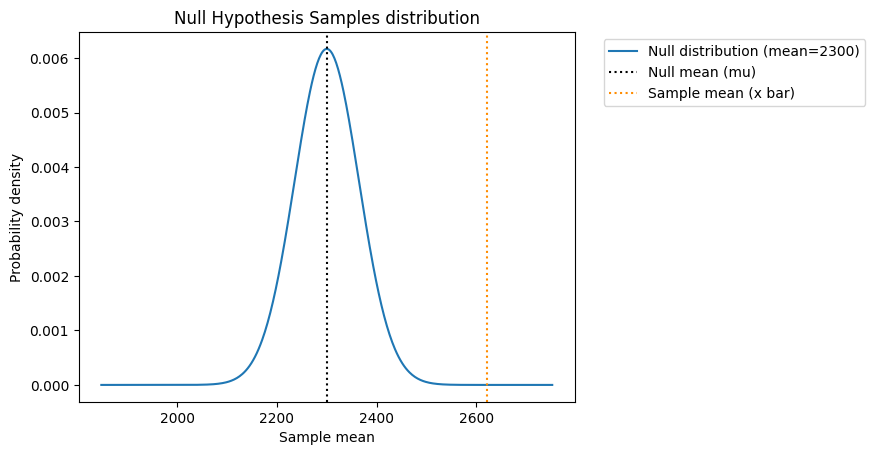

In [ ]:
#@title Near/Far visualized
# Plot averages distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Parameters
mu0 = 2300          # null mean
s = s = np.std(sample, ddof=1)    # sample standard deviation
df = n - 1          # degrees of freedom
SE = s / np.sqrt(n) # standard error

# X-axis for plotting
x = np.linspace(mu0 - 7*SE, mu0 + 7*SE, 500)
y = t.pdf((x - mu0)/SE, df) / SE  # scale PDF correctly



# Plot
plt.plot(x, y, label=f'Null distribution (mean={mu0})')
plt.axvline(mu0, color='black', linestyle=':', label='Null mean (mu)')
plt.axvline(sample.mean(), color='darkorange', linestyle=':', label='Sample mean (x bar)')
plt.legend(bbox_to_anchor=(1.6, 1), loc='upper right')
plt.xlabel('Sample mean')
plt.ylabel('Probability density')
plt.title('Null Hypothesis Samples distribution')




plt.show()

Since we assumed we don't know the population standard deviation ($σ$), we use the t-distribution with its centre around $\mu$. As seen above, we can see there is some distance between $\mu$ and $\bar{x}$. But at what point do we say that the distance is too big and so $\bar{x}$ must be closer to our actual population mean?

Generally, it is said that if your p-value is less than 0.05 or 5%, it becomes insignificant.

Meaning, there is a less than 5% chance that we will get a sample like the one we picked. Since the sample's mean would be a closer representation of the true population mean as opposed to the null mean ($\mu$), it means that there is a less than 5% chance that $H_0$ is correct. Which is very insignificant. Hence we can confidently say that $H_0$ must be rejected.

If your p-value is greater than 5%, it is still significant.

Meaning, there is more than 5% chance of getting a sample mean like the one we picked. Since the sample's mean would be a closer representation of the true population mean as opposed to the null mean ($\mu$), it means that there is a more than 5% chance that $H_0$ is correct. Which still falls in our significance threshold. Hence, we cannot confidently say that $H_0$ must be rejected.

This is the α or significance level

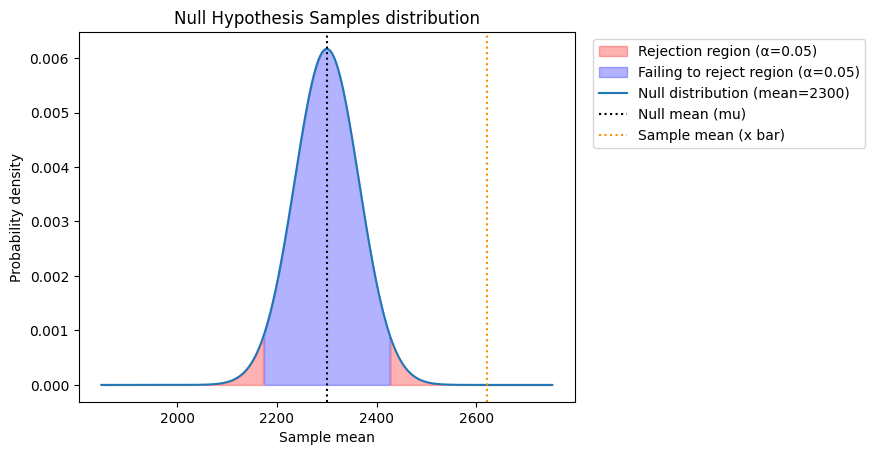

In [ ]:
#@title Position of $\bar{x}$ and significance ($\alpha$)

# Critical values for α=0.05 (two-tailed)
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, df)
crit_low = mu0 - t_crit * SE
crit_high = mu0 + t_crit * SE

# Shade rejection regions
plt.fill_between(x, y, where=(x <= crit_low), color='red', alpha=0.3, label='Rejection region (α=0.05)')
plt.fill_between(x, y, where=(x >= crit_high), color='red', alpha=0.3)
plt.fill_between(x, y, where=(x <= crit_high) & (x >= crit_low), color='blue', alpha=0.3, label='Failing to reject region (α=0.05)')

# Plot
plt.plot(x, y, label=f'Null distribution (mean={mu0})')
plt.axvline(mu0, color='black', linestyle=':', label='Null mean (mu)')
plt.axvline(sample.mean(), color='darkorange', linestyle=':', label='Sample mean (x bar)')
plt.legend(bbox_to_anchor=(1.6, 1), loc='upper right')
plt.xlabel('Sample mean')
plt.ylabel('Probability density')
plt.title('Null Hypothesis Samples distribution')

plt.show()

As you can see, $\bar{x}$ lies way into the rejection region, beyond the rejection region line. So we can definitely say that we reject the $H_0$ claim that the population mean is 2500.

If it had been in the failing to reject region, we couldn't say that $H_0$ claim is correct (since the region is so big). But we could say that we aren't able to confidently reject $H_0$ claim. There is still some unsureness in our findings.

This is essentially what you do when you calculate the t-statistic (or z-statistic if you know the population).

You convert the sample mean value to a t-value,
that t-value is part of the t-distribution,
that t-distribution gives you the probability value (for your sample's mean)

if the p-value < significance level (or $t_{\bar{x}}$ < $t_{crit}$) then reject $H_0$

if the p-value > significance level (or $t_{\bar{x}}$ > $t_{crit}$) then fail to reject $H_0$

#Findings

Since we can find out the population mean, now let's compare it to our assumed population mean under null hypothesis ($\mu$) and our sample's mean ($\bar{x}$).

In [ ]:
#@title Comparison
print(f'Population mean: {population.mean()}')
print(f'Sample mean: {sample.mean()}')
print(f'Null hypothesis mean: {mu0}')
print('\n')
print(f'Deviation of sample mean from population mean: {abs(population.mean()-sample.mean())}')
print(f'Deviation of Null hypothesis mean from population mean: {abs(population.mean()-mu0)}')

Population mean: 2643.664411764706
Sample mean: 2621.398
Null hypothesis mean: 2300


Deviation of sample mean from population mean: 22.266411764705936
Deviation of Null hypothesis mean from population mean: 343.6644117647061
